# Analiza regresyjna

**Zadanie 1**
korzystając z pliku *retail_sales_dataset.csv* odczytaj dane i przeanalizuj je i stwórz model regresji do następujących punktów oraz sprawdź jakość modelu przez obliczenie $R^2$, MAE, MSE, RMSE.

1. Sprawdź jak cena jednostkowa produktu `Price per Unit` może wpływać na ilość kupowanych produktów `Quantity`. Oblicz tą zależność dla każdej z kategorii osobno.
2. Przeanalizuj czy wiek `Age`, płeć `Gender` ma wpływ na liczbę zakupionych produktów `Quantity`.


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Wczytanie danych
data = pd.read_csv('retail_sales_dataset.csv')

# Przypisanie zmiennych (Quantity jako zmienna zależna, Price per Unit jako zmienna niezależna)
X = data[['Quantity']]  # Zmienna niezależna (musimy mieć 2D)
Y = data['Price per Unit']  # Zmienna zależna

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Tworzenie modelu regresji liniowej
lin_reg = LinearRegression()

# Dopasowanie modelu do danych treningowych
lin_reg.fit(X_train, y_train)

# Predykcja na zbiorze testowym
predictions = lin_reg.predict(X_test)

# Ocena jakości modelu
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Wyniki
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


R^2: -0.02302461887162388
MAE: 172.44041973643468
MSE: 34469.383935252336
RMSE: 185.65932224171328


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


data = pd.read_csv('retail_sales_dataset.csv')


data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})


X = data[['Age', 'Gender']]  
Y = data['Quantity']  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


R^2: -0.019288713622883424
MAE: 1.0518656294709159
MSE: 1.363416891961387
RMSE: 1.1676544403038884


**Zadanie 2**
Korzystając z pliku *walmart.csv*, przeanalizuj dane i stwórz model regresji liniowej do każdego z punktów. Pamiętaj aby sprawdzić dokładność każdego modelu obliczając $R^2$, MAE, MSE, RMSE.

1. Przeanalizuj wpływ temperatury `Temperature` na sprzedaż tygodniową `Weekly_Sales`.
2. Podziel dane na sezony "wiosna", "lato", "jesień" "zima" i sprawdź czy pory roku mogą mieć wpływ na sprzedaż
3. Bazując na całym zestawie danych, podziel dane po sklepach `store` i przeanalizuj dane dla każdego sklepu osobno czy temperatura może mieć wpływ na sprzedaż.
4. Bazując na całych zbiorze danych sprawdź czy cena paliwa `Fule_Price`, dzień świąteczny `Holiday_Flag` oraz temperatura `Temperature` mają wpływ na sprzedaż tygodniową `Weekly_Sales`.

2.1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Wczytanie danych
data = pd.read_csv('walmart.csv')

# Przygotowanie zmiennych X i Y
X = data[['Temperature']]  # Zmienna niezależna: Temperatura
Y = data['Weekly_Sales']   # Zmienna zależna: Sprzedaż

# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Tworzenie modelu regresji liniowej
lin_reg = LinearRegression()

# Dopasowanie modelu do danych treningowych
lin_reg.fit(X_train, y_train)

# Predykcja na zbiorze testowym
predictions = lin_reg.predict(X_test)

# Ocena jakości modelu
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Wyniki
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


R^2: 0.004941358267956053
MAE: 467684.7508794738
MSE: 319559273528.5901
RMSE: 565295.7398818693


2.2

In [44]:
# Przekształcenie daty na format datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Funkcja do przypisania pory roku na podstawie miesiąca
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Dodanie kolumny 'Season' na podstawie miesiąca
data['Season'] = data['Date'].dt.month.apply(assign_season)

# Przekształcenie zmiennej Season na zmienną numeryczną
data['Season'] = data['Season'].map({'Winter': 0, 'Spring': 1, 'Summer': 2, 'Fall': 3})

# Przygotowanie zmiennych X i Y
X = data[['Season']]  # Zmienna niezależna: Sezon
Y = data['Weekly_Sales']   # Zmienna zależna: Sprzedaż

# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Tworzenie modelu regresji liniowej
lin_reg = LinearRegression()

# Dopasowanie modelu do danych treningowych
lin_reg.fit(X_train, y_train)

# Predykcja na zbiorze testowym
predictions = lin_reg.predict(X_test)

# Ocena jakości modelu
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Wyniki
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


R^2: 0.001116251263325485
MAE: 467832.2587807798
MSE: 320787691999.92883
RMSE: 566381.2249712457


2.3

In [45]:
# Grupowanie danych po sklepie
stores = data['Store'].unique()

# Iteracja po sklepach i tworzenie modelu regresji liniowej
for store in stores:
    store_data = data[data['Store'] == store]
    
    X = store_data[['Temperature']]  # Zmienna niezależna: Temperatura
    Y = store_data['Weekly_Sales']   # Zmienna zależna: Sprzedaż
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
    
    # Tworzenie modelu regresji liniowej
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    
    # Predykcja na zbiorze testowym
    predictions = lin_reg.predict(X_test)
    
    # Ocena jakości modelu
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    
    print(f'Store {store} - R^2: {r2}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')


Store 1 - R^2: -0.040127222134274776, MAE: 109712.00125959195, MSE: 23283034991.46019, RMSE: 152587.7943724864
Store 2 - R^2: 0.07471892127804314, MAE: 148070.55727216008, MSE: 43653704962.911446, RMSE: 208934.69066411984
Store 3 - R^2: 0.11590348745500534, MAE: 39648.62050114463, MSE: 2337213866.018368, RMSE: 48344.73979678004
Store 4 - R^2: 0.06885976062411303, MAE: 188777.83429847923, MSE: 63140085633.007416, RMSE: 251276.91026635817
Store 5 - R^2: -0.04917434273634602, MAE: 29004.32070108292, MSE: 1855108027.7947998, RMSE: 43070.9650204729
Store 6 - R^2: -0.096639680519919, MAE: 148135.071612831, MSE: 43727188472.63821, RMSE: 209110.46954334498
Store 7 - R^2: -0.0014610045766887403, MAE: 81084.00308356664, MSE: 11801202118.11245, RMSE: 108633.33796819672
Store 8 - R^2: 0.10017717889948963, MAE: 66806.12539453413, MSE: 9731327931.593163, RMSE: 98647.49328590749
Store 9 - R^2: 0.02290525369098184, MAE: 50659.953343443725, MSE: 5086320565.185404, RMSE: 71318.4447754254
Store 10 - R^2:

2.4

In [46]:
# Przygotowanie zmiennych X i Y
X = data[['Fuel_Price', 'Holiday_Flag', 'Temperature']]  # Zmienna niezależna
Y = data['Weekly_Sales']   # Zmienna zależna: Sprzedaż

# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Tworzenie modelu regresji liniowej
lin_reg = LinearRegression()

# Dopasowanie modelu do danych treningowych
lin_reg.fit(X_train, y_train)

# Predykcja na zbiorze testowym
predictions = lin_reg.predict(X_test)

# Ocena jakości modelu
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Wyniki
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


R^2: 0.006305020586263033
MAE: 467044.07140251633
MSE: 319121338595.41077
RMSE: 564908.2567952169


**Zadanie 3**
Odczytaj dane z pliku *ifood_df.csv* i poanalizuj wszystkie dane, stwórz model regresji liniowej dla następujących punktów oraz sprawdź skuteczność modelu.
1. Na podstawie macierzy korelacji przeanalizuj dane i sprawdź, które kolumny najlepiej wybrać do modelu regresji:
* wydatki na regularne produkty `MntRegularProds`
* wydatki na wino `MntWines`
* wydatki na produkty mięsne `MntMeatProducts`
* dochód `Income`
* Liczba zakupów katalogowych `NumCatalogPurchases`
* Liczba dzieci `Kidhome`
* Liczba wizyt na stronie internetowej w miesiącu `NumWebVisitsMonth`
  
2. wybierz 3 najlepiej skorelowane kolumny z kolumną całkowite wydatki `mntTotal` i oblicz model regresji, sprawdź jakość modelu wykonując następujące obliczenia: $R^2$, MAE, MSE, RMSE.


3.1

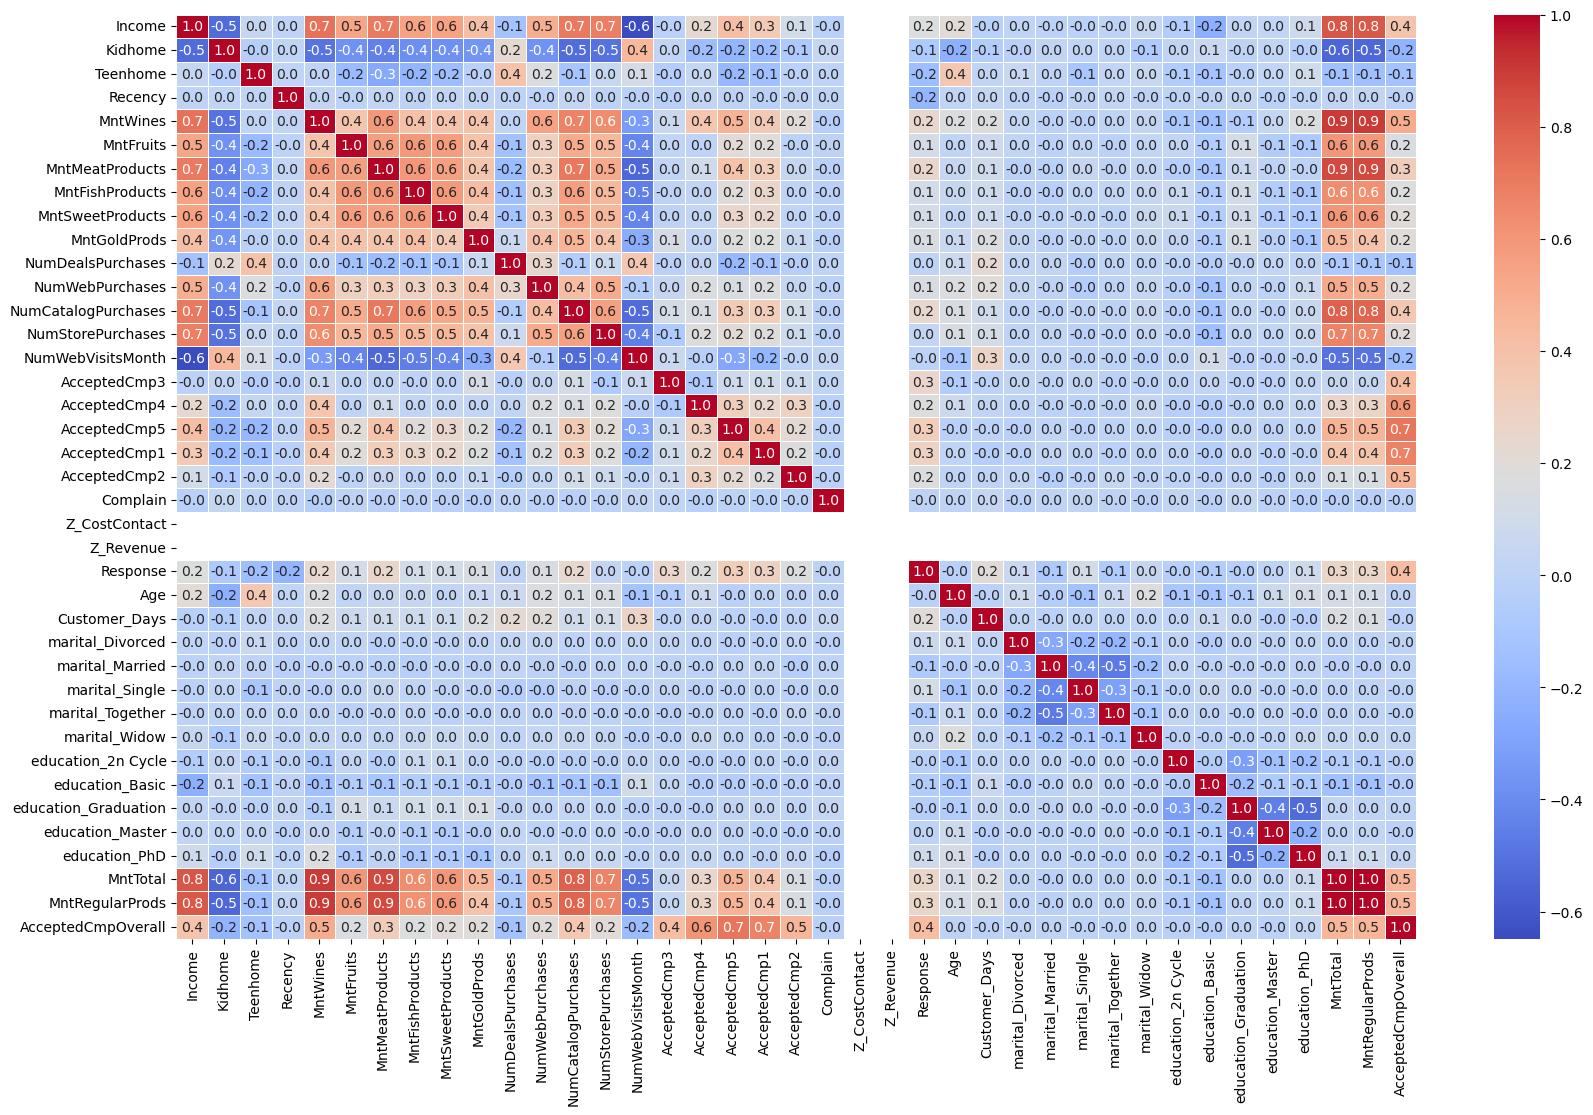

MntTotal                1.000000
MntRegularProds         0.996569
MntWines                0.902310
MntMeatProducts         0.861392
Income                  0.823066
NumCatalogPurchases     0.791187
NumStorePurchases       0.677893
MntFishProducts         0.635038
MntFruits               0.606658
MntSweetProducts        0.604514
NumWebPurchases         0.521086
AcceptedCmp5            0.475559
MntGoldProds            0.463694
AcceptedCmpOverall      0.461279
AcceptedCmp1            0.384526
Response                0.264895
AcceptedCmp4            0.259158
Customer_Days           0.150476
AcceptedCmp2            0.138390
Age                     0.118370
education_PhD           0.070804
AcceptedCmp3            0.044571
marital_Widow           0.035878
Recency                 0.021132
education_Graduation    0.014332
education_Master        0.006362
marital_Single          0.005940
marital_Divorced        0.003726
marital_Together        0.001622
marital_Married        -0.022251
Complain  

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie danych
data = pd.read_csv('ifood_df.csv')

# Obliczenie macierzy korelacji
correlation_matrix = data.corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
plt.show()

# Wyświetlanie najlepszych kolumn skorelowanych z 'MntTotal'
correlation_with_mntTotal = correlation_matrix['MntTotal'].sort_values(ascending=False)
print(correlation_with_mntTotal)


3.2

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Wybór 3 najlepiej skorelowanych zmiennych (np. 'MntWines', 'MntMeatProducts', 'Income')
X = data[['MntWines', 'MntMeatProducts', 'Income']]
y = data['MntTotal']

# Podział danych na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Tworzenie modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

# Predykcja
y_pred = model.predict(X_test)

# Obliczenie jakości modelu
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Wyświetlenie wyników
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


R^2: 0.9808052019901132
MAE: 56.23485623508091
MSE: 6367.323219294962
RMSE: 79.79550876643974


**Zadanie 4**
Zapoznaj się z zawartością pliku *advertising.csv*. Utwórz na jego podstawie ramkę danych. Uzyskaj podstawowe informacje o danych, a następnie:
1. Zbuduj model regresji liniowej przewidujący sprzedaż (`Sales`) na podstawie wydatków na reklamy w telewizji (`TV`). Wypisz współczynnik $R^2$ i wzór funkcji regresji.
2. Zbuduj trzy modele regresji liniowej przewidujące sprzedaż (`Sales`) na podstawie:
    - wydatków na reklamy w `TV`;
    - wydatków na reklamy w `Radio`;
    - wydatków na reklamy w `Newspaper`.
      
    Porównaj wartości $R^2$ tych trzech modeli. Który predyktor jest najlepszy?

3. Zbuduj model regresji wielorakiej przewidujący sprzedaż (`Sales`) na podstawie wszystkich trzech predyktorów (`TV`, `Radio`, `Newspaper`).  Wypisz współczynniki modelu i wzór funkcji regresji.
4. Zwizualizuj model regresji wielorakiej w 3D, pokazując punkty danych i przewidywaną płaszczyznę regresji dla dwóch zmiennych niezależnych, np. `TV` i `Radio`.
5. Usuń predyktor `Newspaper` z modelu wielorakiego i ponownie zbuduj model regresji dla `TV` i `Radio`. Porównaj $R^2$ obu modeli. Czy dodanie wydatków na `Newspaper` znacząco poprawia jakość modelu?
6. Na podstawie wybranego modelu (np. wielorakiego) dokonaj predykcji sprzedaży dla danych:
    - `TV`: $150$, `Radio`: $20$, `Newspaper`: $15$;
    - `TV`: $200$, `Radio`: $30$, `Newspaper`: $25$.


4.1

In [ ]:
import pandas as pd

data = pd.read_csv('advertising.csv')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Wybór zmiennych niezależnych (TV) i zależnej (Sales)
X = data[['TV']]
y = data['Sales']

# Tworzenie modelu regresji
model_tv = LinearRegression()
model_tv.fit(X, y)

y_pred_tv = model_tv.predict(X)

r2_tv = r2_score(y, y_pred_tv)
print(f'R^2 dla modelu TV: {r2_tv}')
print(f'Wzór funkcji regresji: Sales = {model_tv.intercept_:.2f} + {model_tv.coef_[0]:.2f} * TV')

R^2 dla modelu TV: 0.611875050850071
Wzór funkcji regresji: Sales = 7.03 + 0.05 * TV


4.2

In [64]:
X_tv = data[['TV']]
model_tv = LinearRegression()
model_tv.fit(X_tv, y)
y_pred_tv = model_tv.predict(X_tv)
r2_tv = r2_score(y, y_pred_tv)

X_radio = data[['Radio']]
model_radio = LinearRegression()
model_radio.fit(X_radio, y)
y_pred_radio = model_radio.predict(X_radio)
r2_radio = r2_score(y, y_pred_radio)

X_newspaper = data[['Newspaper']]
model_newspaper = LinearRegression()
model_newspaper.fit(X_newspaper, y)
y_pred_newspaper = model_newspaper.predict(X_newspaper)
r2_newspaper = r2_score(y, y_pred_newspaper)

print(f'R^2 dla modelu TV: {r2_tv}')
print(f'R^2 dla modelu Radio: {r2_radio}')
print(f'R^2 dla modelu Newspaper: {r2_newspaper}')

R^2 dla modelu TV: 0.611875050850071
R^2 dla modelu Radio: 0.33203245544529525
R^2 dla modelu Newspaper: 0.05212044544430516


4.3

In [65]:
X_multi = data[['TV', 'Radio', 'Newspaper']]

model_multi = LinearRegression()
model_multi.fit(X_multi, y)

y_pred_multi = model_multi.predict(X_multi)

print(f'Współczynnik R^2: {model_multi.score(X_multi, y)}')
print(f'Wzór funkcji regresji: Sales = {model_multi.intercept_:.2f} + {model_multi.coef_[0]:.2f} * TV + {model_multi.coef_[1]:.2f} * Radio + {model_multi.coef_[2]:.2f} * Newspaper')

Współczynnik R^2: 0.8972106381789522
Wzór funkcji regresji: Sales = 2.94 + 0.05 * TV + 0.19 * Radio + -0.00 * Newspaper


4.4

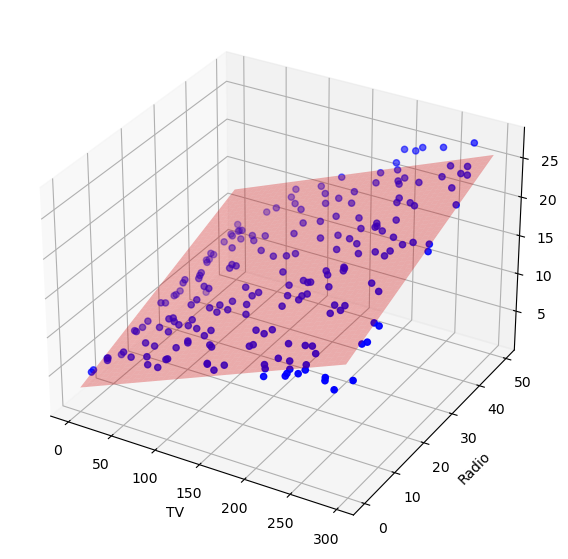

In [66]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['TV'], data['Radio'], data['Sales'], color='blue', label='Data Points')

x_surf, y_surf = np.meshgrid(np.linspace(data['TV'].min(), data['TV'].max(), 100),
                             np.linspace(data['Radio'].min(), data['Radio'].max(), 100))
z_surf = model_multi.intercept_ + model_multi.coef_[0] * x_surf + model_multi.coef_[1] * y_surf

ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.3)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

4.5

In [68]:
X_tv_radio = data[['TV', 'Radio']]
model_tv_radio = LinearRegression()
model_tv_radio.fit(X_tv_radio, y)

r2_tv_radio = model_tv_radio.score(X_tv_radio, y)
print(f'R^2 dla modelu (TV + Radio): {r2_tv_radio}')

print(f'R^2 dla modelu (TV + Radio + Newspaper): {model_multi.score(X_multi, y)}')

R^2 dla modelu (TV + Radio): 0.8971942610828956
R^2 dla modelu (TV + Radio + Newspaper): 0.8972106381789522


4.6

In [71]:
import pandas as pd
import numpy as np

pred1 = model_multi.predict(pd.DataFrame([[150, 20, 15]], columns=['TV', 'Radio', 'Newspaper']))
pred2 = model_multi.predict(pd.DataFrame([[200, 30, 25]], columns=['TV', 'Radio', 'Newspaper']))

print(f'Predykcja dla TV=150, Radio=20, Newspaper=15: {pred1[0]}')
print(f'Predykcja dla TV=200, Radio=30, Newspaper=25: {pred2[0]}')


Predykcja dla TV=150, Radio=20, Newspaper=15: 13.558624130495996
Predykcja dla TV=200, Radio=30, Newspaper=25: 17.72178164202316


**Zadanie 5**
Zapoznaj się z zawartością pliku *co2.csv*. Utwórz na jego podstawie ramkę danych. Uzyskaj podstawowe informacje o danych, a następnie odpwiedź na pytania:
1. Jak pojemność silnika wpływa na emisję $\mbox{CO}_2$? Przeanalizuj wpływ `Engine Size(L)` na emisję $\mbox{CO}_2$, by zrozumieć zależność między wielkością silnika a emisją.
2. Jak liczba cylindrów i typ paliwa wpływają na emisję $\mbox{CO}_2$? Połącz `Cylinders` i zakodowany `Fuel Type`, aby zbadać, jak wpływają na emisję $\mbox{CO}_2$.
3. Czy zużycie paliwa w mieście i na autostradzie razem lepiej przewiduje emisję $\mbox{CO}_2$ niż zużycie paliwa w trybie mieszanym? Porównj modele regresji liniowej:
    - Model 1: `Fuel Consumption City (L/100 km)` i `Fuel Consumption Hwy (L/100 km)` jako zmienne niezależne.
    - Model 2: `Fuel Consumption Comb (L/100 km)` jako zmienna niezależna.
4. Czy emisja $\mbox{CO}_2$ różni się w zależności od klasy pojazdu? Zakoduj `Vehicle Class` i zbadaj wpływ różnych klas pojazdów na emisję $\mbox{CO}_2$.
5. Czy zużycie paliwa w milach na galon (`Fuel Consumption Comb (mpg)`) można przewidzieć na podstawie emisji $\mbox{CO}_2$? Odwróć typową analizę, próbując przewidzieć zużycie paliwa w milach na galon w oparciu o emisję $\mbox{CO}_2$.


5.1

                     Engine Size(L)  CO2 Emissions(g/km)
Engine Size(L)             1.000000             0.851145
CO2 Emissions(g/km)        0.851145             1.000000


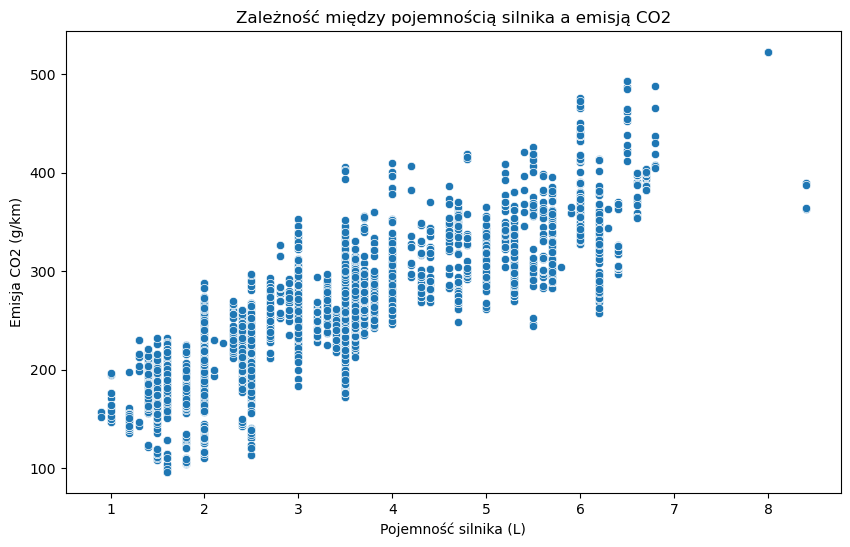

Współczynnik R^2: 0.724447204652408
MAE: 23.28838637001911
MSE: 943.2916297051705
RMSE: 30.713053083423187
Wzór regresji: CO2 = 134.37 + 36.78 * Engine Size(L)


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Wczytaj dane
data = pd.read_csv('co2.csv')

# Analiza korelacji
correlation = data[['Engine Size(L)', 'CO2 Emissions(g/km)']].corr()
print(correlation)

# Wizualizacja zależności
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=data)
plt.title('Zależność między pojemnością silnika a emisją CO2')
plt.xlabel('Pojemność silnika (L)')
plt.ylabel('Emisja CO2 (g/km)')
plt.show()

# Model regresji
X = data[['Engine Size(L)']]
y = data['CO2 Emissions(g/km)']

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

# Ocena modelu
r2 = r2_score(y, predictions)
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = mean_squared_error(y, predictions, squared=False)

print(f'Współczynnik R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Wzór regresji
print(f'Wzór regresji: CO2 = {model.intercept_:.2f} + {model.coef_[0]:.2f} * Engine Size(L)')


5.2

In [73]:
data = pd.get_dummies(data, columns=['Fuel Type'], drop_first=True)

X = data[['Cylinders', 'Fuel Type_Z']]  
y = data['CO2 Emissions(g/km)']

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

r2 = r2_score(y, predictions)
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = mean_squared_error(y, predictions, squared=False)

print(f'Współczynnik R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


Współczynnik R^2: 0.6932953771687406
MAE: 24.587293851555266
MSE: 1049.9327475290538
RMSE: 32.402665747266134


5.3

In [74]:
X1 = data[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']]
y = data['CO2 Emissions(g/km)']

model1 = LinearRegression()
model1.fit(X1, y)
predictions1 = model1.predict(X1)

X2 = data[['Fuel Consumption Comb (L/100 km)']]
model2 = LinearRegression()
model2.fit(X2, y)
predictions2 = model2.predict(X2)

r2_model1 = r2_score(y, predictions1)
r2_model2 = r2_score(y, predictions2)

print(f'R^2 Model 1 (miasto + autostrada): {r2_model1}')
print(f'R^2 Model 2 (tryb mieszany): {r2_model2}')


R^2 Model 1 (miasto + autostrada): 0.846982446929685
R^2 Model 2 (tryb mieszany): 0.8428186895623989


5.4

In [78]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Wczytaj dane
data = pd.read_csv('co2.csv')

# Zakodowanie zmiennych kategorycznych za pomocą One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['Fuel Type', 'Transmission', 'Vehicle Class'], drop_first=True)

# Zmienna niezależna: Wszystkie zmienne (poza 'CO2 Emissions(g/km)', 'Make', 'Model')
X = data_encoded.drop(columns=['CO2 Emissions(g/km)', 'Make', 'Model'])

# Zmienna zależna: 'CO2 Emissions(g/km)'
y = data['CO2 Emissions(g/km)']

# Model regresji
model = LinearRegression()
model.fit(X, y)

# Predykcja
predictions = model.predict(X)

# Ocena modelu
r2 = r2_score(y, predictions)

# Wyniki
print(f'Współczynnik R^2: {r2}')


Współczynnik R^2: 0.9933214047706711


5.5

In [80]:
X = data[['CO2 Emissions(g/km)']]
y = data['Fuel Consumption Comb (mpg)']

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

r2 = r2_score(y, predictions)
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = mean_squared_error(y, predictions, squared=False)

print(f'Współczynnik R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


Współczynnik R^2: 0.8234224657110063
MAE: 1.8073730904963374
MSE: 9.23376801656126
RMSE: 3.0387115717950692


**Zadanie 6**
Zapoznaj się z zawartością pliku *cars.csv*.
1. Utwórz na jego podstawie ramkę danych. Uzyskaj podstawowe informacje o danych, a następnie:
   - sprawdź ewentualne brakujące dane w kolumnach numerycznych i uzupełnianij je średnią wartością dla tych kolumn numerycznych;
   - naprawa dane w postacji ujemnych cen (zamień na medianę);
2. Zbudować model regresji na danych na podstawie uzyskanych danych i przedstawić znaleziony model wraz z danymi na wykresie (analogicznie jak na wykładzie). Jako predyktor dobrać jedną z cech, która wykazuje wysoką korelację z ceną.
3. Zbudować jeszcze 2 modele regresji liniowej do cen samochodów, oparte na innych predyktorach. Policzyć współczynnik $R^2$ dla tych 3 modeli, używając odpowiedniej funkcji z pakietu `scikit-learn`. Który z predyktorów dał najlepsze wyniki? Czy to ten sam predyktor, który ma najwyższą korelację z ceną?
4. Zbudować na tych samych danych model regresji wielorakiej z użyciem kilku predyktorów (np. 2 albo 3), wypisać jego współczynniki i zapisać za ich pomocą wzór na znalezioną funkcję regresji. Dopisać własną funkcję w Pythonie, która policzy $R^2_{adj}$ zgodnie z formułą z wykładu.
5. Zastosować regresję wielomianową do budowy modelu zależności `citympg` od `horsepower` (lub innej zależności, której kształt jest nieliniowy; możemy je łatwo znaleźć za pomocą wykresu `pairplot` z pakietu `seaborn`.
6. Przedstawić model regresji wielorakiej z 2 predyktorami na wykresie trójwymiarowym; wykres ma ilustrować punkty (dane) z użyciem `scatterplot` oraz płaszczyznę, która przedstawi znaleziony model regresji. Przykłady, jak takie wykresy tworzyć znajdziemy:
*[tutaj](https://matplotlib.org/stable/gallery/mplot3d/index.html)* i *[tutaj](https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python#1.-Multiple-linear-regression)*

6.1

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('cars.csv')

print(data.info())
print(data.describe())

print(data.isnull().sum())

numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

data['price'] = data['price'].apply(lambda x: np.median(data['price']) if x < 0 else x)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         165 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

6.2

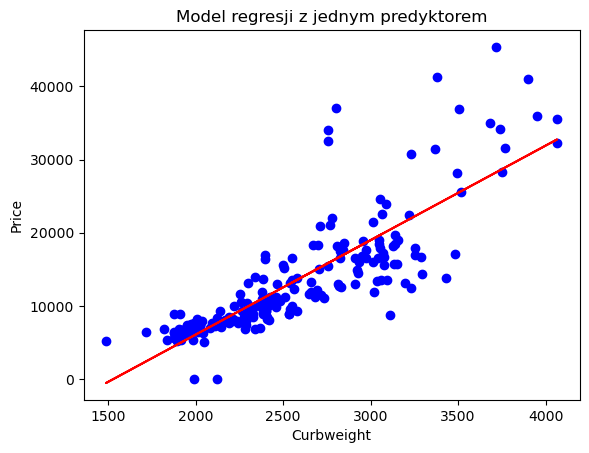

In [82]:
X1 = data[['curbweight']]
y = data['price']

model1 = LinearRegression()
model1.fit(X1, y)

y_pred1 = model1.predict(X1)

plt.scatter(X1, y, color='blue')
plt.plot(X1, y_pred1, color='red')
plt.title('Model regresji z jednym predyktorem')
plt.xlabel('Curbweight')
plt.ylabel('Price')
plt.show()

6.3

In [83]:
X2 = data[['enginesize']]
model2 = LinearRegression()
model2.fit(X2, y)
y_pred2 = model2.predict(X2)

# Model 3: 'horsepower'
X3 = data[['horsepower']]
model3 = LinearRegression()
model3.fit(X3, y)
y_pred3 = model3.predict(X3)

# Obliczenie współczynnika R^2 dla wszystkich trzech modeli
r2_1 = r2_score(y, y_pred1)
r2_2 = r2_score(y, y_pred2)
r2_3 = r2_score(y, y_pred3)

print(f'R^2 dla modelu 1 (curbweight): {r2_1}')
print(f'R^2 dla modelu 2 (enginesize): {r2_2}')
print(f'R^2 dla modelu 3 (horsepower): {r2_3}')

R^2 dla modelu 1 (curbweight): 0.6964955437032074
R^2 dla modelu 2 (enginesize): 0.7601828269123195
R^2 dla modelu 3 (horsepower): 0.6514078757905335


6.4

In [84]:
# 8. Model regresji wielorakiej (np. 'curbweight', 'enginesize', 'horsepower')
X_multi = data[['curbweight', 'enginesize', 'horsepower']]
model_multi = LinearRegression()
model_multi.fit(X_multi, y)

# Wypisanie współczynników regresji
print(f'Współczynniki regresji wielorakiej: {model_multi.coef_}')
print(f'Przechwycona wartość: {model_multi.intercept_}')

# Funkcja do obliczenia R^2_adj
def adjusted_r2(X, y, model):
    n = len(y)  # liczba próbek
    p = X.shape[1]  # liczba predyktorów
    r2 = r2_score(y, model.predict(X))
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

r2_adj = adjusted_r2(X_multi, y, model_multi)
print(f'Adjusted R^2 dla regresji wielorakiej: {r2_adj}')


Współczynniki regresji wielorakiej: [ 4.35786517 84.24198427 49.46869208]
Przechwycona wartość: -13716.313201248593
Adjusted R^2 dla regresji wielorakiej: 0.8080947494864728


6.5

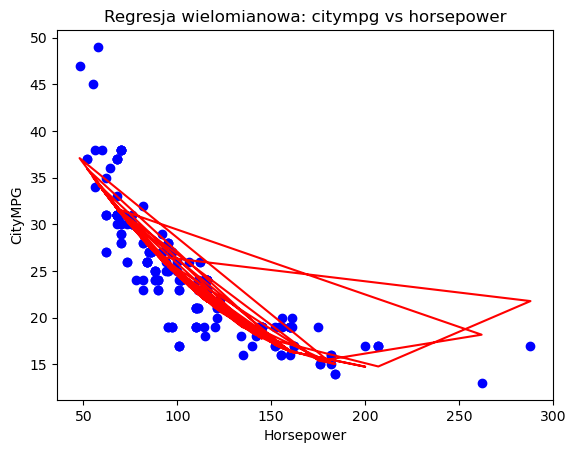

In [86]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(data[['horsepower']])
model_poly = LinearRegression()
model_poly.fit(X_poly, data['citympg'])

# Wykres regresji wielomianowej
plt.scatter(data['horsepower'], data['citympg'], color='blue')
plt.plot(data['horsepower'], model_poly.predict(X_poly), color='red')
plt.title('Regresja wielomianowa: citympg vs horsepower')
plt.xlabel('Horsepower')
plt.ylabel('CityMPG')
plt.show()


6.6

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


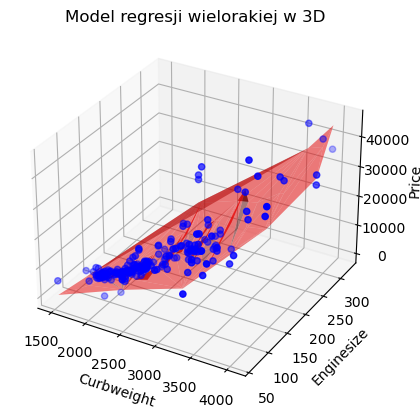

In [88]:
# Stworzenie danych do przewidywania dla płaszczyzny regresji (trzy cechy)
X_plane = np.array([data['curbweight'], data['enginesize'], data['horsepower']]).T

# Upewnij się, że dane do przewidywania mają odpowiednią liczbę cech (3 cechy)
y_plane = model_multi.predict(X_plane)

# Stworzenie wykresu 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['curbweight'], data['enginesize'], data['price'], color='blue')

# Płaszczyzna regresji
ax.plot_trisurf(data['curbweight'], data['enginesize'], y_plane, color='red', alpha=0.5)

plt.title('Model regresji wielorakiej w 3D')
ax.set_xlabel('Curbweight')
ax.set_ylabel('Enginesize')
ax.set_zlabel('Price')
plt.show()
